In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('/content/Diwali Sales Data.csv', encoding='unicode_escape')
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0,NaN,NaN
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0,NaN,NaN
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0,NaN,NaN
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0,NaN,NaN


In [ ]:
df.shape

(11251, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [ ]:
#dropping 2 blank column


In [ ]:
#check for null values
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

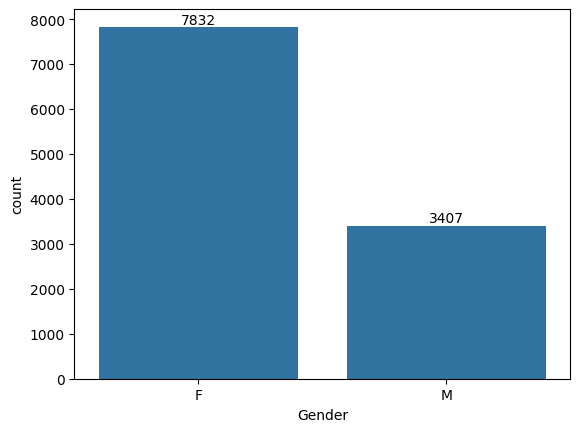

In [ ]:
#Here we will count sales by Gender
Gender_count=sns.countplot(x="Gender",data=df)
for bars in Gender_count.containers:
    Gender_count.bar_label(bars)

**from the above graph we can see female has more perchase count than male**

<Axes: xlabel='Gender', ylabel='Amount'>

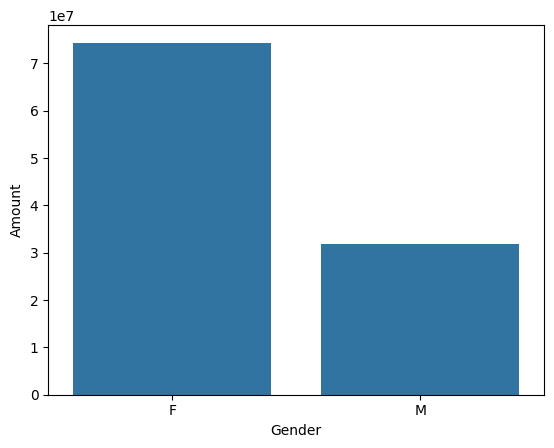

In [ ]:
#Gender distribution by Amount
Sales_Gen=df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Gender',y="Amount",data=Sales_Gen)

From the above graph we can see female has more perchasing amount than make

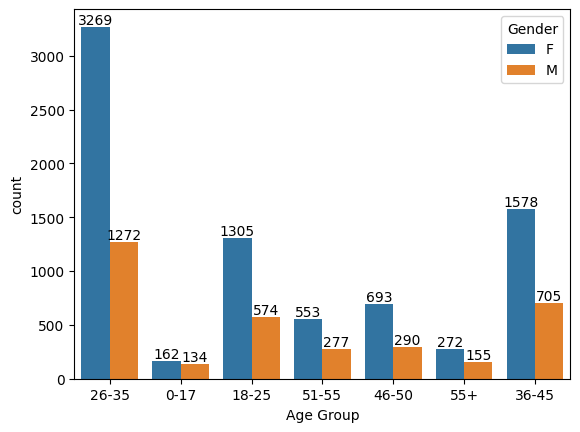

In [ ]:
#distributin by Age group & Gender
ax=sns.countplot(x='Age Group' ,data=df,hue='Gender')
for bars in ax.containers:
  ax.bar_label(bars)

## From the above graph we can see most of the buyers are from the age group between 26-35 and its female

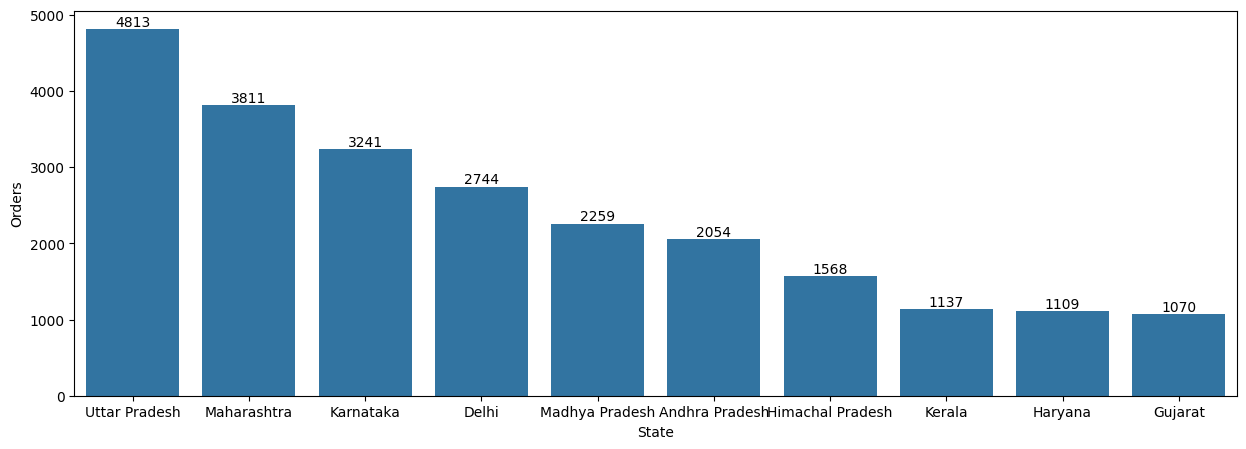

In [51]:
#total number of order from top 10 state
sales_state= df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sales_state
plt.figure(figsize=(15,5))

ax=sns.barplot(data=sales_state,x='State', y ='Orders' )
for bars in ax.containers:
  ax.bar_label(bars)


From the above Chart we can see most buyers are from UP,Maharastra & karnataka

<Axes: xlabel='State', ylabel='Amount'>

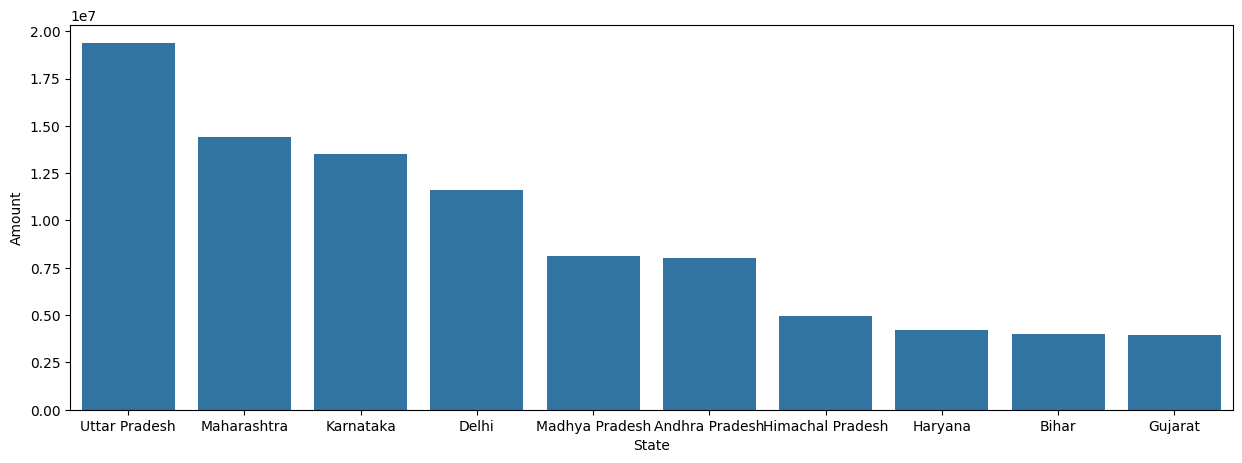

In [50]:
#total number of Amount from top 10 state
Amount_state= df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
Amount_state
plt.figure(figsize=(15,5))

sns.barplot(data=Amount_state,x='State', y ='Amount' )


From the above graph we can see most buyers in amount are fron UP, Maharastra & Karnataka

<Axes: xlabel='Marital_Status', ylabel='Amount'>

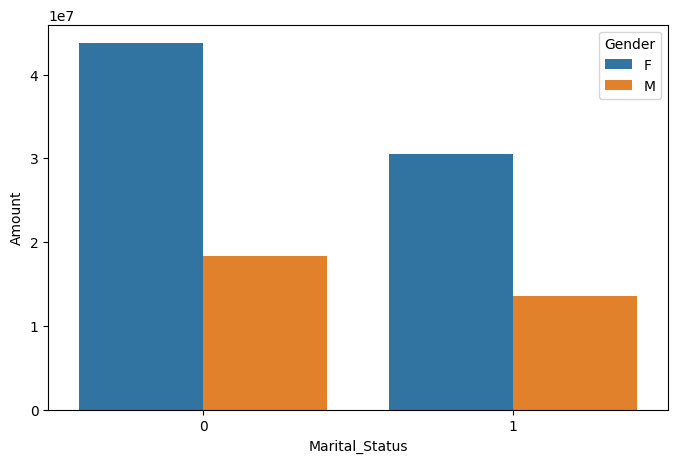

In [35]:
#total number of Amount by Gender & Marital Stauts
Amount_Marital= df.groupby(['Gender','Marital_Status'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
Amount_Marital
plt.figure(figsize=(8,5))

sns.barplot(data=Amount_Marital,x='Marital_Status', y ='Amount' ,hue='Gender' )

# from the above graph we can see most buyers in amount are married & Female

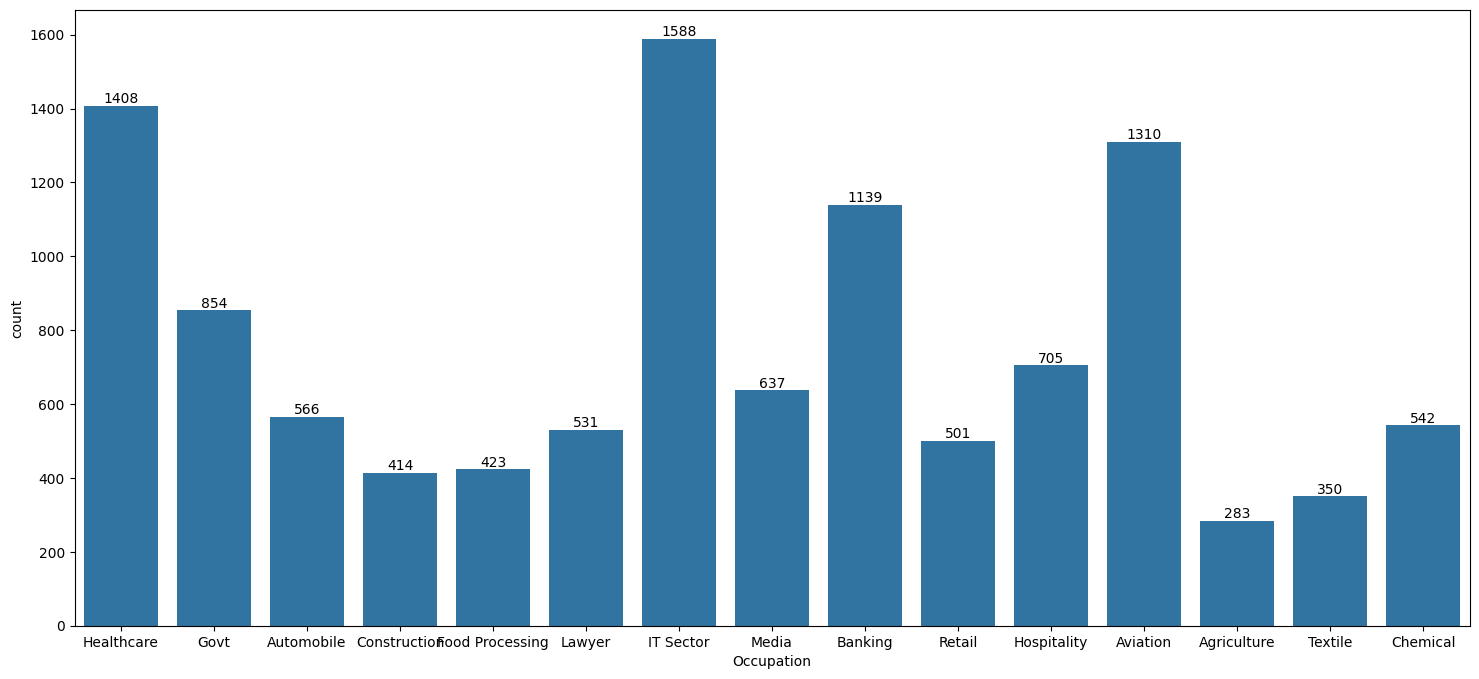

In [52]:
#most purchasing by Occupation
plt.figure(figsize=(18,8))
ax= sns.countplot(x='Occupation',data=df)
for bars in ax.containers:
  ax.bar_label(bars)


### From the above chart we can see most of the buyers are working in IT,Aviation & Healthcare

<Axes: xlabel='Occupation', ylabel='Amount'>

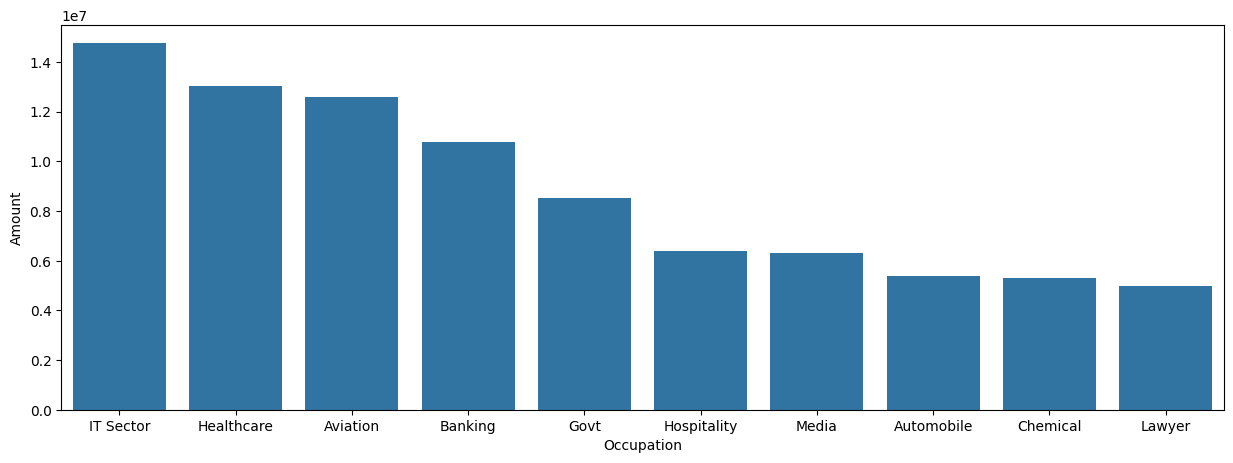

In [55]:
#number of amount by occupation
Amount_Marital= df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
Amount_Marital
plt.figure(figsize=(15,5))

sns.barplot(data=Amount_Marital,x='Occupation', y ='Amount' ,)

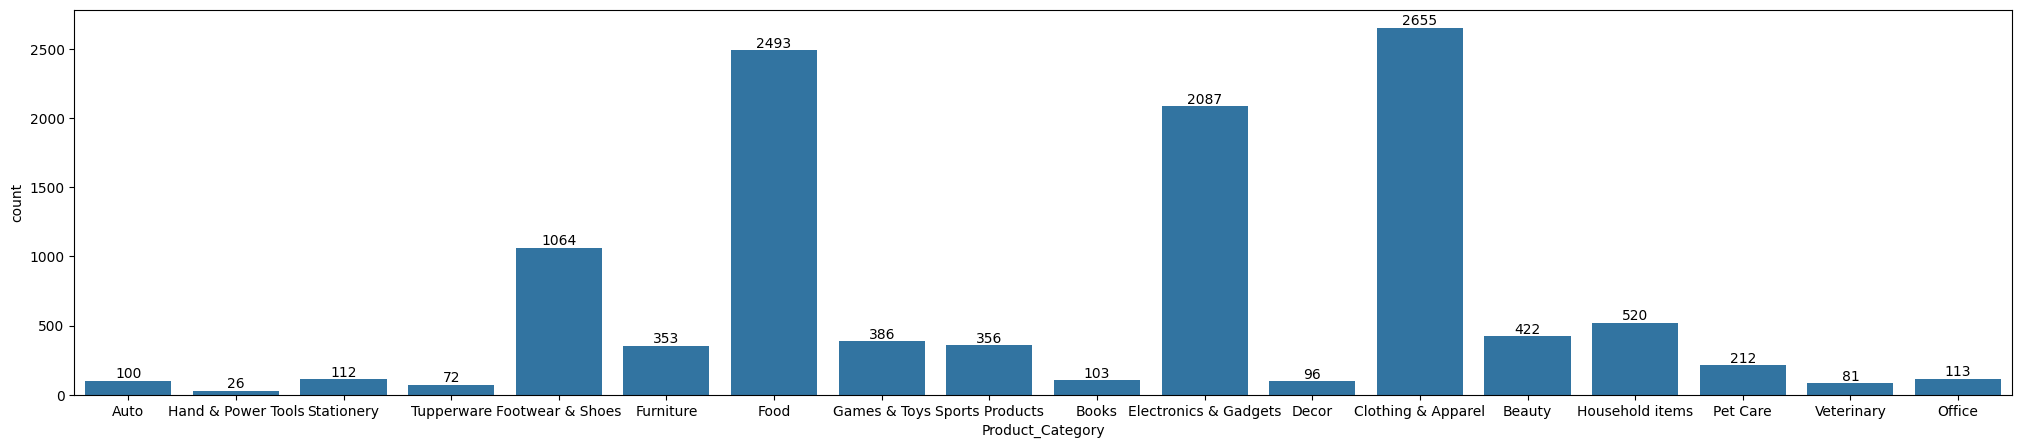

In [77]:
plt.figure(figsize=(25,5))
ax=sns.countplot(data=df,x="Product_Category")
for bars in ax.containers:
   ax.bar_label(bars)

From the above graph we can see most selling products are Clothing,Food & Electronic

<Axes: xlabel='Product_Category', ylabel='Amount'>

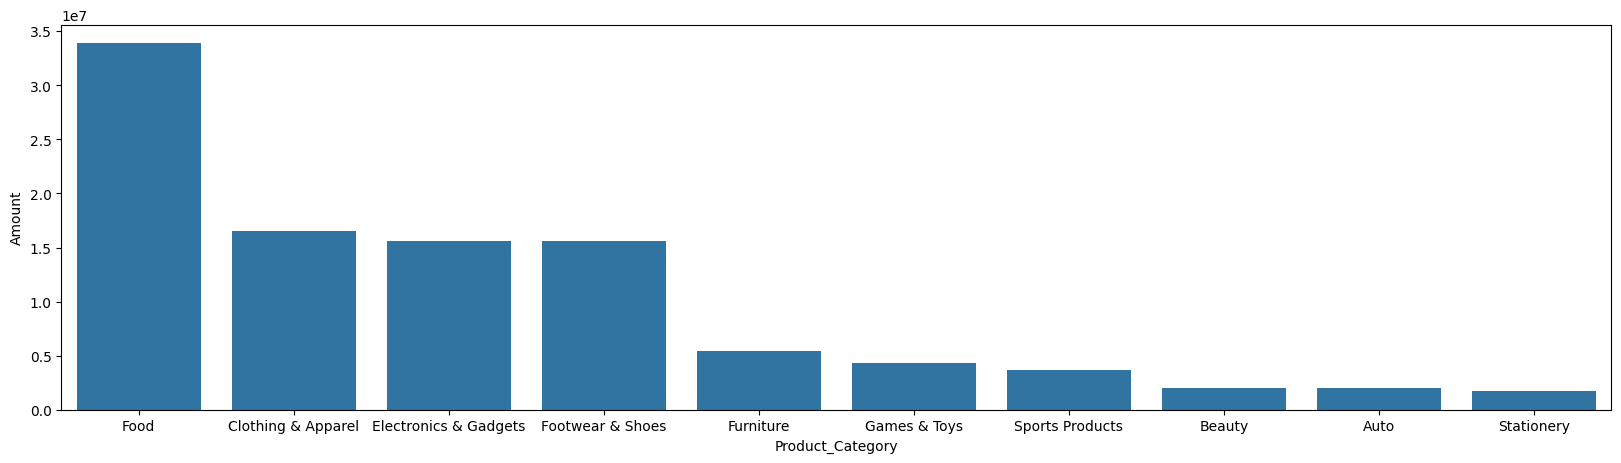

In [68]:
#number of amount by Product_catogory
Product_Category= df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

plt.figure(figsize=(20,5))

sns.barplot(data=Amount_Marital,x='Product_Category', y ='Amount' ,)

From the above chart we can see most selling products in amount are Food,cloth & Electronic

<Axes: xlabel='Product_ID', ylabel='Orders'>

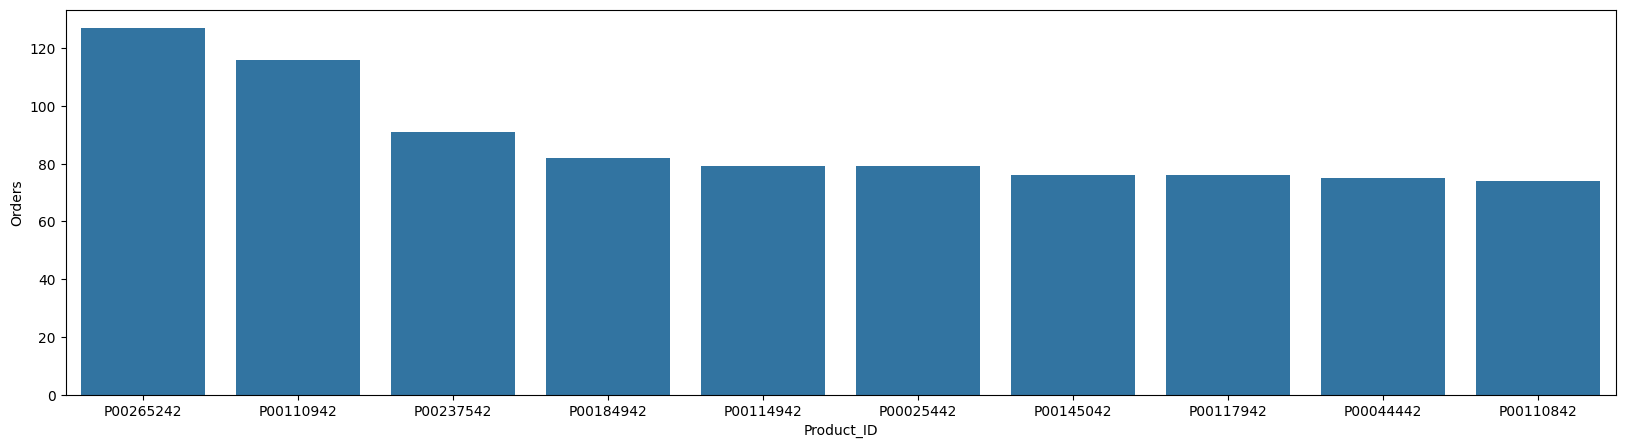

In [73]:
#top 10 selling prodct by product ID
Product_ID= df.groupby(['Product_ID'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)

plt.figure(figsize=(20,5))

sns.barplot(data=Product_ID,x='Product_ID', y ='Orders' ,)

# From the above graph we can see top 10 selling product ID

### **Conclusion of Analysis :**
married women between 26-35 Y old from UP, Maharastra & karnataka working in IT,Aviation & Healthcare are more likely to buy products from food ,clothing & Electronic Catogory.